In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Transition Matrix

In [3]:
P = np.array([[  0, 1/3, 1/4,   0,   0,   0],
              [1/2,   0, 1/4, 1/4,   0,   0],
              [1/2, 1/3,   0, 1/4, 1/3,   0],
              [  0, 1/3, 1/4,   0, 1/3, 1/2],
              [  0,   0, 1/4, 1/4,   0, 1/2],
              [  0,   0,   0, 1/4, 1/3,   0]]);

## Stationary Distribution via Eigenvalues

The stationary distribution of a markov chain is the normalized eigenvector of the transition matrix, corresponding to the eigenvalue $\lambda = 1$.

In [4]:
es, vs = np.linalg.eig(P)
i = np.argmax(np.isclose(es, 1.0))
v = vs[:, i]
v = v / sum(v)
print(v)

[ 0.11111111  0.16666667  0.22222222  0.22222222  0.16666667  0.11111111]


## Visualize powers of the transition matrix


Consider the $n^{th}$ power of the transition matrix, $P^n$.

This matrix corresponds to $n$ step transition probabilities, i.e. $P_{ij}^n = \mathbf{Pr} (X_{t+n} = i \mid X_t = j)$. It is possible to visually check that if $n$ transitions enough for the chain to *mix* by plotting $P^n$. We should observe identical columns for *mixed chains*.

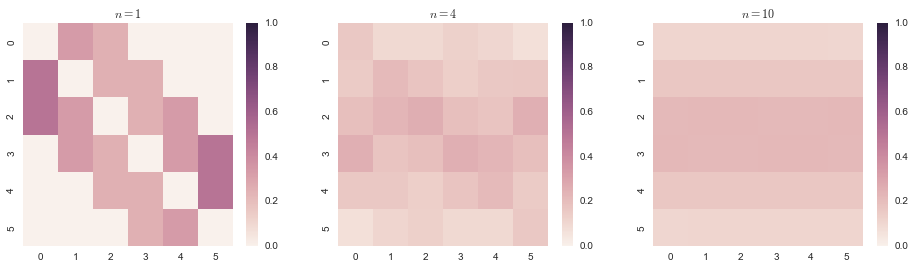

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
for i, n in enumerate([1, 4, 10]):
    sns.heatmap(np.linalg.matrix_power(P, n), vmin = 0, vmax = 1, ax = ax[i])
    ax[i].set_title("$n = %d$" % n)
plt.show()

## Detailed Balance

Detailed balance condition is expressed as $P_{ji} \pi_i = P_{ij} \pi_j$, where $\pi$ is the stationary distribution and $P$ is the transition matrix.

In [6]:
x = np.dot(P, np.diag(v))
print(x)

[[ 0.          0.05555556  0.05555556  0.          0.          0.        ]
 [ 0.05555556  0.          0.05555556  0.05555556  0.          0.        ]
 [ 0.05555556  0.05555556  0.          0.05555556  0.05555556  0.        ]
 [ 0.          0.05555556  0.05555556  0.          0.05555556  0.05555556]
 [ 0.          0.          0.05555556  0.05555556  0.          0.05555556]
 [ 0.          0.          0.          0.05555556  0.05555556  0.        ]]


In [31]:
# x.T is the same as x.transpose()
np.isclose(x, x.T).all()

True

## Simulation

In [8]:
def simulate(P, N):
    chain = np.zeros(N).astype(int)
    chain[0] = 0
    for i in range(1,N):
        pr = P[:, chain[i-1]]
        chain[i] = np.random.choice(range(6), p = pr)

    return(chain)

In [9]:
chain = simulate(P, int(1e4))

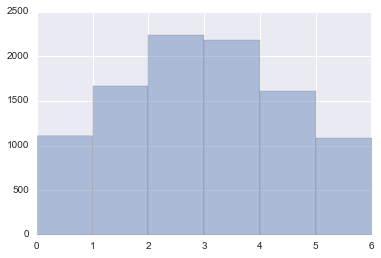

In [10]:
nburnin = 100
sns.distplot(chain[nburnin:], kde = False, bins=[0,1,2,3,4,5,6])
plt.show()

## Independent samples

It is possible to obtain independent samples from the stationary distribution by running multiple chains. If chains are long enough for them to mix, then the final states of each chain are i.i.d. samples from the stationary distribution.

The following script runs multiple chains and then computes a histogram for each step of the chain and finally plots a heatmap.

In [32]:
nchains = 1000
chain_length = 50
samples = np.zeros([nchains, chain_length]).astype(int)
for i in range(0, nchains):
    ch = simulate(P, chain_length)
    samples[i,:] = ch

In [35]:
column_histograms = np.apply_along_axis(lambda x: np.histogram(x, bins=[0,1,2,3,4,5,6], density = True)[0], 0, samples)

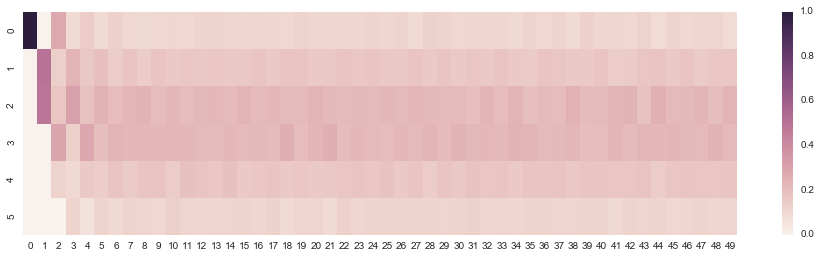

In [36]:
plt.figure(figsize=(16, 4))
sns.heatmap(column_histograms)
plt.show()

Folloginw plot explicitly shows the histogram of the last states of each chain. If the chains are long enough, these samples are i.i.d from the stationary distribution of the chain.

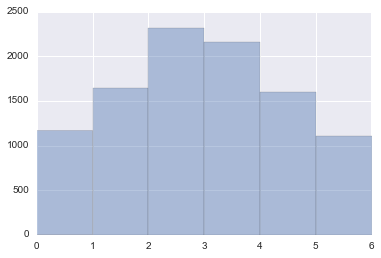

In [14]:
sns.distplot(samples[:, chain_length-1], kde = False, bins = [0,1,2,3,4,5,6])
plt.show()